# SVM

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Generate or Load Dataset

In [ ]:
X, y = make_blobs(n_samples=72, n_features=7129, centers=2, cluster_std=1.0, random_state=42)
print(X.shape)
print(y.shape)

In [68]:
X, y = make_gaussian_quantiles(n_samples=100, n_features=600, n_classes=2, random_state=42)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


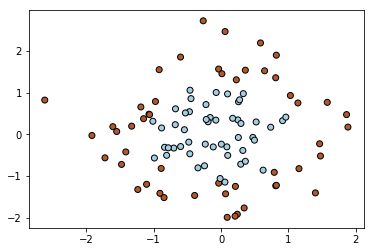

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')

## Split data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True, random_state=42)

## Learning

In [71]:
clf = SVC(gamma='auto', kernel='linear', random_state=42)
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

## Evaluation

In [72]:
# predict label
y_pred = clf.predict(X_test)

### Confusion matrix
| TN | FP |  
| FN | TP | 

In [73]:
confusion_matrix(y_test, y_pred)

array([[12,  1],
       [13,  4]])

### Metrics

In [74]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.5333333333333333


In [75]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.92      0.63        13
           1       0.80      0.24      0.36        17

   micro avg       0.53      0.53      0.53        30
   macro avg       0.64      0.58      0.50        30
weighted avg       0.66      0.53      0.48        30



## Plot

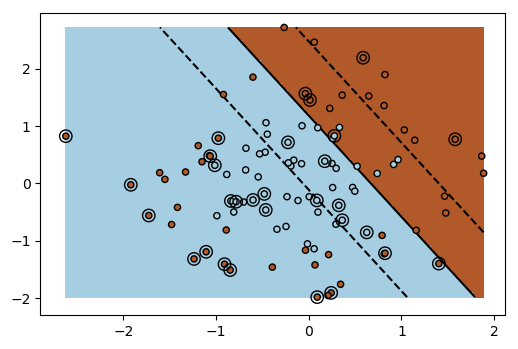

In [76]:
plt.figure(dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=20)
# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])